<a href="https://colab.research.google.com/github/windyday0622/windyday/blob/main/m3_%EB%B6%84%EC%84%9D%20%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/%20pandas_%EC%8B%A4%EC%8A%B5_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg (1).csv
Saving mtcars.csv to mtcars (1).csv


In [3]:
import pandas as pd

#데이터 불러오기
file_path = 'mtcars.csv'
df= pd.read_csv(file_path,index_col=0)

#데이터 확인
print(df.head())

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 4.0+ KB


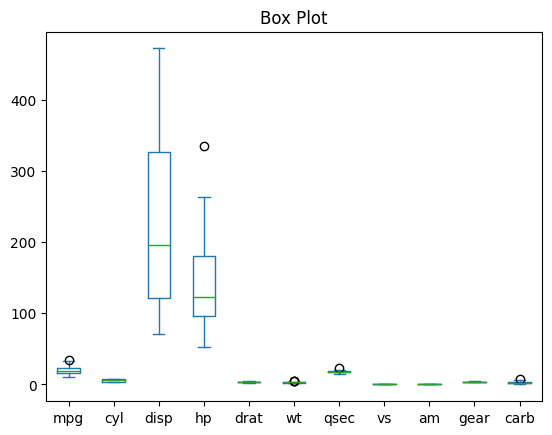

In [6]:
import matplotlib.pyplot as plt
df.plot.box()
plt.title('Box Plot')
plt.show()

In [ ]:
# 변수 탐색, 변수 선택, 전처리
# 상관계수 행렬 시각화
# 분석용 데이터셋 구축, 확인
# 데이터 표준화
# 표준화된 데이터를 데이터 프레임으로 변환

In [ ]:
# mpg: 연비(miles per gallon)
# cyl: 실린더 개수(number of cylinders)
# disp: 배기량(displacement)
# hp: 마력(horsepower)
# drat: 후륜비(rear axle ratio)
# wt: 차량 무게(weight)
# qsec: 1/4 마일 달성 시간(1/4 mile time)
# vs: 엔진 형태(V/S)
# am: 변속기 종류(automatic or manual)
# gear: 기어 수(number of gears)
# carb: 기화기 개수(number of carburetors

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

auto_mpg_df = pd.read_csv('/content/auto-mpg.csv')
mtcars_df = pd.read_csv('/content/mtcars.csv')

print(auto_mpg_df.info())
print(mtcars_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   h

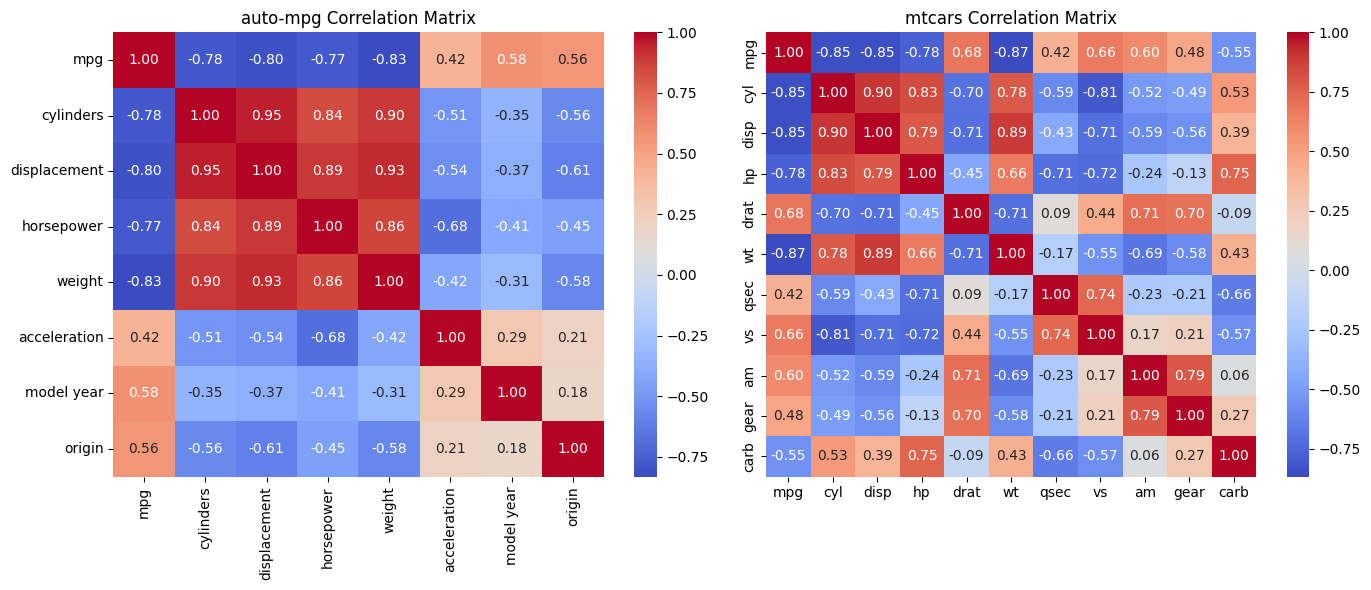

In [19]:
import pandas as pd

# 1. 데이터 로드
auto_mpg_df = pd.read_csv('auto-mpg.csv')
mtcars_df = pd.read_csv('mtcars.csv')

# 2. 'horsepower' 컬럼의 문자열 값 제거
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].str.extract('(\d+)', expand=False).astype(float)

# 3. 결측값 처리
auto_mpg_numeric_cols = auto_mpg_df.select_dtypes(include=['float64', 'int64']).columns
auto_mpg_df[auto_mpg_numeric_cols] = auto_mpg_df[auto_mpg_numeric_cols].fillna(auto_mpg_df[auto_mpg_numeric_cols].mean())

mtcars_numeric_cols = mtcars_df.select_dtypes(include=['float64', 'int64']).columns
mtcars_df[mtcars_numeric_cols] = mtcars_df[mtcars_numeric_cols].fillna(mtcars_df[mtcars_numeric_cols].mean())

# 4. 상관관계 분석
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(auto_mpg_df[auto_mpg_numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('auto-mpg Correlation Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(mtcars_df[mtcars_numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('mtcars Correlation Matrix')

plt.tight_layout()
plt.show()

데이터 불러오기:
Pandas를 사용하여 (import pandas as pd) 두 개의 데이터셋을 불러옵니다: 'auto-mpg.csv'와 'mtcars.csv'. 이러한 데이터셋은 각각 auto_mpg_df와 mtcars_df라는 DataFrame 객체에 저장됩니다.

데이터 전처리:
'auto-mpg.csv' 데이터셋에 대해:
'horsepower' 열에서 문자가 아닌 문자열(예: 문자)을 제거하고 결과적인 문자열을 float로 변환합니다.
각 숫자형 열의 결측값을 해당 열의 평균값으로 채웁니다.
'mtcars.csv' 데이터셋에 대해:
마찬가지로, 각 숫자형 열의 결측값을 해당 열의 평균값으로 채웁니다.

상관관계 분석:
데이터 시각화를 위해 matplotlib.pyplot (import matplotlib.pyplot as plt)와 seaborn (import seaborn as sns)을 사용합니다.
두 개의 옆으로 나란히 있는 서브플롯을 만듭니다 (plt.subplot(1, 2, 1) 및 plt.subplot(1, 2, 2)).
각 데이터셋(auto_mpg_df 및 mtcars_df)에 대해:
숫자형 열의 상관관계 행렬을 .corr()을 사용하여 계산합니다.
sns.heatmap()을 사용하여 상관관계 행렬을 히트맵으로 시각화합니다.
인자 annot=True는 히트맵에 상관 계수를 표시합니다.
cmap='coolwarm' 인자는 히트맵의 색상 팔레트를 설정합니다.
fmt=".2f" 인자는 주석을 두 자리 소수점으로 표시합니다.
각 서브플롯에 제목을 설정합니다.

플롯 표시:
더 나은 레이아웃을 위해 plt.tight_layout()을 사용하여 서브플롯 매개변수를 조정합니다.
마지막으로, plt.show()를 사용하여 플롯을 표시합니다.

In [20]:
auto_mpg_analysis_df = auto_mpg_df[auto_mpg_numeric_cols]
mtcars_analysis_df = mtcars_df[mtcars_numeric_cols]

print(auto_mpg_analysis_df.head())
print(mtcars_analysis_df.head())

scaler = StandardScaler()

auto_mpg_standardized = scaler.fit_transform(auto_mpg_analysis_df)
mtcars_standardized = scaler.fit_transform(mtcars_analysis_df)

auto_mpg_standardized_df = pd.DataFrame(auto_mpg_standardized, columns=auto_mpg_numeric_cols)
mtcars_standardized_df = pd.DataFrame(mtcars_standardized, columns=mtcars_numeric_cols)

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  
    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2


데이터를 표준화하는데 사용됩니다. 여기에서는 StandardScaler를 사용하여 각 데이터셋의 숫자형 열을 표준화합니다.

데이터 준비:
auto_mpg_analysis_df와 mtcars_analysis_df는 각각 'auto-mpg.csv' 및 'mtcars.csv' 데이터프레임에서 숫자형 열만 추출하여 준비한 것입니다. 이렇게 하면 표준화할 숫자형 열만 남게 됩니다.

표준화:
StandardScaler 객체를 생성하여 데이터를 표준화합니다.
scaler.fit_transform() 함수를 사용하여 각 데이터프레임을 표준화된 형태로 변환합니다.
표준화된 데이터는 각 열의 평균이 0이고 표준편차가 1인 분포를 갖도록 조정됩니다.

데이터프레임 재구성:
표준화된 데이터를 다시 데이터프레임으로 변환합니다. 이 때, 열 이름은 원래 데이터프레임의 열 이름으로 설정됩니다.
이렇게 하면 표준화된 데이터셋인 auto_mpg_standardized_df와 mtcars_standardized_df가 생성됩니다.

In [24]:
# 데이터 준비
auto_mpg_analysis_df = auto_mpg_standardized_df
mtcars_analysis_df = mtcars_standardized_df

# 회귀 모델 구축
target_variable = 'mpg'
X = auto_mpg_analysis_df.drop(columns=[target_variable])
y = auto_mpg_analysis_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 0.13
Root Mean Squared Error: 0.37
R-squared: 0.85


데이터 준비:
표준화된 데이터를 사용하여 회귀 모델을 구축하기 위해 auto_mpg_standardized_df를 auto_mpg_analysis_df로, mtcars_standardized_df를 mtcars_analysis_df로 복사합니다.

회귀 모델 구축:
종속 변수를 'mpg'로 지정하고 독립 변수를 설정합니다.
훈련 및 테스트 데이터셋을 분할합니다.

선형 회귀 모델 훈련:
LinearRegression()을 사용하여 선형 회귀 모델을 초기화하고, fit() 함수를 사용하여 훈련 데이터에 모델을 적합시킵니다.

예측:
테스트 데이터에 대한 예측을 생성합니다.

모델 성능 평가:
평균 제곱 오차(Mean Squared Error, MSE), 제곱근 평균 제곱 오차(Root Mean Squared Error, RMSE), 결정 계수(R-squared)를 계산하여 모델의 성능을 평가합니다.
이 값들은 모델이 예측한 값들과 실제 값들 간의 차이를 나타냅니다.
이 코드는 표준화된 데이터를 사용하여 선형 회귀 모델을 훈련하고, 테스트 데이터를 사용하여 모델의 성능을 평가하는 과정을 보여줍니다.

In [25]:
# 모델링하고 평가하는 방법
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

NameError: name 'scaled_df' is not defined